# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("previsao_de_renda.csv")

In [5]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')


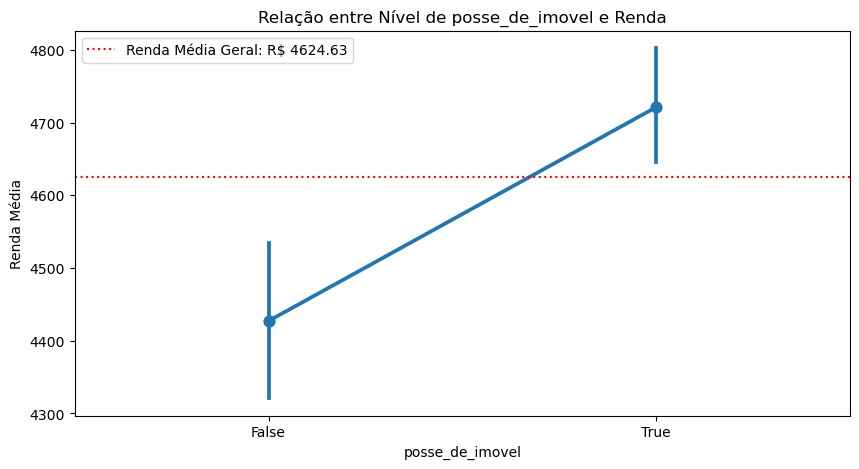

In [7]:
plt.figure(figsize=[10, 5])
ax = sns.pointplot(data=df, x='posse_de_imovel', y='renda', errorbar=('ci', 90))
plt.title('Relação entre Nível de posse_de_imovel e Renda')
plt.xlabel('posse_de_imovel')
plt.ylabel('Renda Média')

# Calculando a média geral da renda
media_geral = df['renda'].mean()

# Adicionando a linha horizontal com o rótulo personalizado
ax.axhline(y=media_geral,
            color='red',
            linestyle=':',
            label=f'Renda Média Geral: R$ {media_geral:.2f}')

plt.legend()
plt.show()

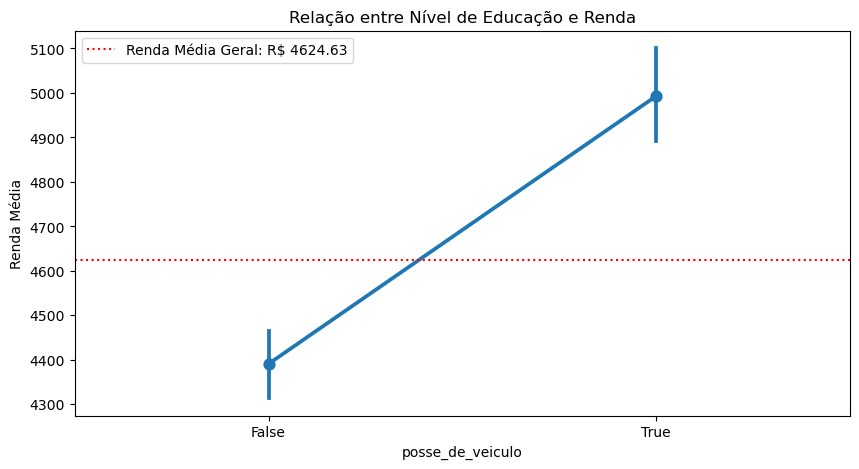

In [8]:
plt.figure(figsize=[10, 5])
ax = sns.pointplot(data=df, x='posse_de_veiculo', y='renda', errorbar=('ci', 90))
plt.title('Relação entre Nível de Educação e Renda')
plt.xlabel('posse_de_veiculo')
plt.ylabel('Renda Média')

# Calculando a média geral da renda
media_geral = df['renda'].mean()

# Adicionando a linha horizontal com o rótulo personalizado
ax.axhline(y=media_geral,
            color='red',
            linestyle=':',
            label=f'Renda Média Geral: R$ {media_geral:.2f}')

plt.legend()
plt.show()

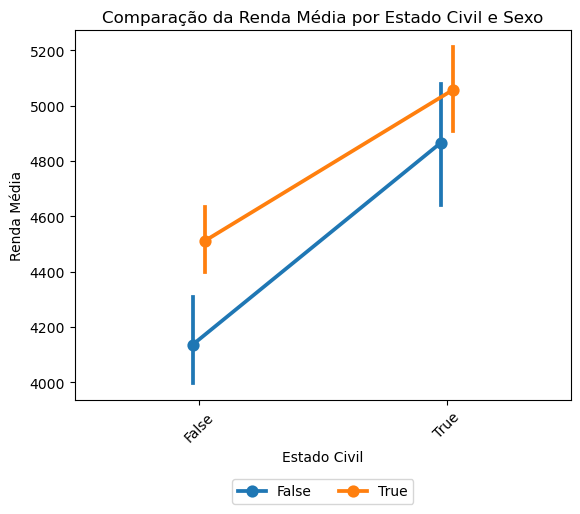

In [14]:

df = df.drop(['Unnamed: 0', 'index'], axis=1) if any(col in df.columns for col in ['Unnamed: 0', 'index']) else df


ax = sns.pointplot(
    x="posse_de_veiculo",
    y="renda",
    hue="posse_de_imovel",
    data=df,
    dodge=True,
    errorbar=("ci", 95)  )

# Customize the plot for clarity
plt.title("Comparação da Renda Média por Estado Civil e Sexo")
plt.xlabel("Estado Civil")
plt.ylabel("Renda Média")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=3)
plt.xticks(rotation=45)  

plt.show()

In [ ]:
#A variável posse de veículo parece discriminar renda de uma melhor forma.
#Aqueles que possue o veículo de fato têm uma renda média bem superior.